In [ ]:
from google.colab import files
uploaded = files.upload()

Saving temperatura.csv to temperatura.csv


In [ ]:
import pandas as pd

# Intenta leer el archivo con la codificación 'ISO-8859-1'
df = pd.read_csv('temperatura.csv', encoding='ISO-8859-1')

# Mostrar las primeras filas del DataFrame
df.head()

,YEAR,MO,DY,HR,CALI,BOGOTÁ,BUCARAMANGA,BARRANQUILLA
0,2003,1,1,0,15.04,17.73,20.12,26.82
1,2003,1,1,1,14.48,17.11,19.68,26.76
2,2003,1,1,2,13.88,16.48,19.48,26.66
3,2003,1,1,3,13.21,15.93,19.30,26.48
4,2003,1,1,4,12.53,15.48,18.90,26.15


In [ ]:
# Asegurarse de que los valores de mes, día y hora tengan el formato adecuado (2 dígitos)
df['MO'] = df['MO'].apply(lambda x: f'{x:02d}')
df['DY'] = df['DY'].apply(lambda x: f'{x:02d}')
df['HR'] = df['HR'].apply(lambda x: f'{x:02d}')

# Crear una nueva columna 'date' que combine las columnas YEAR, MO, DY, y HR
df['date'] = pd.to_datetime(df['YEAR'].astype(str) + '-' + df['MO'] + '-' + df['DY'] + ' ' + df['HR'] + ':00')

# Ver las primeras filas para comprobar
df.head()

,YEAR,MO,DY,HR,CALI,BOGOTÁ,BUCARAMANGA,BARRANQUILLA,date
0,2003,01,01,00,15.04,17.73,20.12,26.82,2003-01-01 00:00:00
1,2003,01,01,01,14.48,17.11,19.68,26.76,2003-01-01 01:00:00
2,2003,01,01,02,13.88,16.48,19.48,26.66,2003-01-01 02:00:00
3,2003,01,01,03,13.21,15.93,19.30,26.48,2003-01-01 03:00:00
4,2003,01,01,04,12.53,15.48,18.90,26.15,2003-01-01 04:00:00


In [ ]:
# Verificar si hay valores nulos
df.isnull().sum()

# Describir las estadísticas básicas de los datos
df.describe()

,YEAR,CALI,BOGOTÁ,BUCARAMANGA,BARRANQUILLA,date
count,184080.000000,184080.000000,184080.000000,184080.000000,184080.000000,184080
mean,2012.999348,16.273239,18.800943,20.205110,27.837386,2013-07-01 23:30:00
min,2003.000000,7.800000,8.440000,9.650000,22.730000,2003-01-01 00:00:00
25%,2008.000000,13.760000,15.970000,17.360000,26.580000,2008-04-01 11:45:00
50%,2013.000000,15.370000,18.050000,19.210000,27.510000,2013-07-01 23:30:00
75%,2018.000000,18.840000,21.700000,22.800000,29.060000,2018-10-01 11:15:00
max,2023.000000,27.820000,31.590000,34.470000,34.650000,2023-12-31 23:00:00
std,6.055120,3.227406,3.532456,3.674893,1.768713,NaN


In [ ]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

# Asegurarnos de que la columna 'date' esté en formato datetime
df['date'] = pd.to_datetime(df['date'])

# Extraer el año y el mes de la columna 'date'
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Seleccionar las ciudades
cities = ['CALI', 'BOGOTÁ', 'BUCARAMANGA', 'BARRANQUILLA']

# Calcular la media y desviación estándar por año, mes y ciudad
monthly_stats = []

for city in cities:
    # Agrupar por año, mes y ciudad, y calcular la media y desviación estándar
    city_stats = df.groupby(['year', 'month'])[city].agg(['mean', 'std']).reset_index()
    city_stats['city'] = city
    monthly_stats.append(city_stats)

# Concatenar las estadísticas de todas las ciudades
final_stats = pd.concat(monthly_stats)

# Crear el widget para seleccionar el año
year_selector = widgets.Dropdown(
    options=[(str(year), year) for year in final_stats['year'].unique()],
    description='Año:',
    disabled=False
)

# Crear el widget para seleccionar la ciudad
city_selector = widgets.Dropdown(
    options=cities,
    description='Ciudad:',
    disabled=False
)

# Función para filtrar y mostrar la tabla basada en los filtros
def filter_data(year, city):
    # Filtrar los datos por año y ciudad seleccionados
    filtered_data = final_stats[(final_stats['year'] == year) & (final_stats['city'] == city)]

    # Mostrar la tabla filtrada solo con la columna 'mean' (sin 'std')
    display(filtered_data[['year', 'month', 'mean']])

# Vincular los widgets con la función para filtrar y mostrar la tabla
widgets.interactive(filter_data, year=year_selector, city=city_selector)


interactive(children=(Dropdown(description='Año:', options=(('2003', 2003), ('2004', 2004), ('2005', 2005), ('…

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact
import matplotlib.table as mtable

# Asegúrate de que la columna 'date' esté correctamente formateada
df['date'] = pd.to_datetime(df['YEAR'].astype(str) + '-' + df['MO'] + '-' + df['DY'].astype(str) + ' ' + df['HR'].astype(str) + ':00')

# Lista de las ciudades y los años para los que deseas hacer el gráfico
cities = ['CALI', 'BOGOTÁ', 'BUCARAMANGA', 'BARRANQUILLA']
years = df['YEAR'].unique()

# Diccionario para mapear números de meses a nombres
month_names = {
    '01': 'Enero', '02': 'Febrero', '03': 'Marzo', '04': 'Abril', '05': 'Mayo', '06': 'Junio',
    '07': 'Julio', '08': 'Agosto', '09': 'Septiembre', '10': 'Octubre', '11': 'Noviembre', '12': 'Diciembre'
}

# Función para encontrar el mes más frío y más caliente para cada ciudad y año
def find_coldest_and_hottest_month(city, years_selected):
    # Filtrar los datos por la ciudad y los años seleccionados
    city_year_data = df[df['YEAR'].isin(years_selected)][['YEAR', 'MO', city]]

    # Crear una figura para el gráfico
    plt.figure(figsize=(12, 6))  # Aumento el tamaño de la figura

    # Crear una lista para almacenar los resultados de la tabla
    table_data = []

    # Iterar sobre los años seleccionados
    for year in years_selected:
        # Agrupar por mes y calcular la temperatura media mensual para la ciudad y el año seleccionado
        monthly_avg_temp = city_year_data[city_year_data['YEAR'] == year].groupby('MO')[city].mean()

        # Encontrar el mes más frío y más caliente
        coldest_month = monthly_avg_temp.idxmin()
        hottest_month = monthly_avg_temp.idxmax()

        # Añadir los resultados de la tabla, formateando las temperaturas a un decimal
        table_data.append([year, month_names[coldest_month], f'{monthly_avg_temp[coldest_month]:.1f}',
                           month_names[hottest_month], f'{monthly_avg_temp[hottest_month]:.1f}'])

        # Graficar la temperatura media mensual para el año seleccionado
        plt.plot(monthly_avg_temp.index.map(month_names), monthly_avg_temp.values, marker='o', label=f'{year}')

    # Añadir título y etiquetas
    plt.title(f'Temperatura media mensual para {city.capitalize()} de los años 2003 a 2023')
    plt.xlabel('Mes')
    plt.ylabel('Temperatura Media (°C)')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)

    # Ajustar el espacio para la leyenda y el gráfico
    plt.tight_layout(pad=3.0)  # Asegura que no haya superposiciones

    # Mover la leyenda fuera del gráfico para evitar la superposición
    plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=9)

    # Mostrar el gráfico
    plt.show()

    # Crear y mostrar la tabla con los resultados
    fig, ax = plt.subplots(figsize=(8, len(years_selected)*0.5))  # Ajustar el tamaño de la figura
    ax.axis('off')  # Desactivar los ejes

    # Añadir el nombre de la ciudad encima de la tabla
    plt.text(0.5, 1.05, f'{city.capitalize()}', ha='center', va='bottom', fontsize=14, fontweight='bold')

    # Crear la tabla sin la columna "Ciudad"
    # Ajustamos el tamaño de las columnas (Año, Mes Más Frío, Temp. Más Frío, Mes Más Caliente, Temp. Más Caliente)
    table = ax.table(cellText=table_data, colLabels=['Año', 'Mes Más Frío', 'Temp. Más Frío (°C)', 'Mes Más Caliente', 'Temp. Más Caliente (°C)'],
                    cellLoc='center', loc='center', colColours=['#f0f0f0']*5, colWidths=[0.1, 0.12, 0.15, 0.15, 0.16])

    # Establecer el tamaño de la fuente para la tabla
    table.set_fontsize(10)

    plt.tight_layout(pad=3.0)
    plt.show()

# Crear el widget interactivo para seleccionar la ciudad y los años
interact(find_coldest_and_hottest_month,
         city=widgets.Dropdown(options=cities, description='Ciudad:'),
         years_selected=widgets.SelectMultiple(options=years, description='Años:', value=tuple(years[:1])))  # Selección múltiple de años

interactive(children=(Dropdown(description='Ciudad:', options=('CALI', 'BOGOTÁ', 'BUCARAMANGA', 'BARRANQUILLA'…

<function __main__.find_coldest_and_hottest_month(city, years_selected)>

In [ ]:
!pip install ipywidgets
!pip install seaborn

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

# Asegúrate de que la columna 'date' esté correctamente formateada
df['date'] = pd.to_datetime(df['YEAR'].astype(str) + '-' + df['MO'] + '-' + df['DY'].astype(str) + ' ' + df['HR'].astype(str) + ':00')

# Crear un widget interactivo para seleccionar el año y la ciudad
years = df['YEAR'].unique()
cities = ['CALI', 'BOGOTÁ', 'BUCARAMANGA', 'BARRANQUILLA']

# Mapa de números de mes a nombres de mes
month_names = {
    '01': 'Enero', '02': 'Febrero', '03': 'Marzo', '04': 'Abril', '05': 'Mayo', '06': 'Junio',
    '07': 'Julio', '08': 'Agosto', '09': 'Septiembre', '10': 'Octubre', '11': 'Noviembre', '12': 'Diciembre'
}

# Función para generar el boxplot basado en el año y ciudad seleccionados
def plot_boxplot(year, city):
    # Filtrar los datos por año y ciudad seleccionados
    filtered_data = df[df['YEAR'] == year][['MO', city]]

    # Crear el boxplot para las temperaturas de cada mes
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='MO', y=city, data=filtered_data, order=[str(i).zfill(2) for i in range(1, 13)])

    # Añadir título y etiquetas
    plt.title(f'Boxplot de temperaturas mensuales para la ciudad de {city.capitalize()} - {year}')
    plt.xlabel('Mes')
    plt.ylabel('Temperatura (°C)')

    # Cambiar los números de los meses por los nombres
    plt.xticks(ticks=range(12), labels=[month_names[str(i).zfill(2)] for i in range(1, 13)], rotation=45, ha='right')

    # Añadir la grilla y ajustar el layout
    plt.grid(True)
    plt.tight_layout()

    # Mostrar el gráfico
    plt.show()

# Crear el widget interactivo
interact(plot_boxplot, year=widgets.Dropdown(options=years, description='Año:'),
         city=widgets.Dropdown(options=cities, description='Ciudad:'))

interactive(children=(Dropdown(description='Año:', options=(2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 20…

<function __main__.plot_boxplot(year, city)>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

# Asegúrate de que la columna 'date' esté correctamente formateada
df['date'] = pd.to_datetime(df['YEAR'].astype(str) + '-' + df['MO'] + '-' + df['DY'].astype(str) + ' ' + df['HR'].astype(str) + ':00')

# Lista de ciudades
cities = ['CALI', 'BOGOTÁ', 'BUCARAMANGA', 'BARRANQUILLA']

# Función para generar el gráfico de temperatura media por año
def plot_avg_temp_by_year(city):
    # Agrupar por año y calcular la temperatura media de cada año para la ciudad seleccionada
    city_yearly_avg = df.groupby('YEAR')[city].mean()

    # Crear el gráfico de la temperatura media por año
    plt.figure(figsize=(10, 6))
    plt.plot(city_yearly_avg.index, city_yearly_avg.values, marker='o', linestyle='-', color='b', label=f'Temperatura Media Anual ({city})')

    # Añadir título y etiquetas
    plt.title(f'Temperatura media anual para la ciudad de {city.capitalize()}')
    plt.xlabel('Año')
    plt.ylabel('Temperatura Media (°C)')

    # Ajustar el rango del eje X para que vaya de uno en uno
    plt.xticks(range(int(city_yearly_avg.index.min()), int(city_yearly_avg.index.max()) + 1, 1), rotation=45, ha='right')

    plt.grid(True)
    plt.tight_layout()

    # Mostrar el gráfico
    plt.legend()
    plt.show()

# Crear el widget interactivo para seleccionar la ciudad
interact(plot_avg_temp_by_year, city=widgets.Dropdown(options=cities, description='Ciudad:'))

interactive(children=(Dropdown(description='Ciudad:', options=('CALI', 'BOGOTÁ', 'BUCARAMANGA', 'BARRANQUILLA'…

<function __main__.plot_avg_temp_by_year(city)>

In [ ]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

# Asegurarnos de que la columna 'date' esté en formato datetime
df['date'] = pd.to_datetime(df['date'])

# Extraer el año y el mes de la columna 'date'
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Seleccionar las ciudades
cities = ['CALI', 'BOGOTÁ', 'BUCARAMANGA', 'BARRANQUILLA']

# Calcular la media y desviación estándar por año, mes y ciudad
monthly_stats = []

for city in cities:
    # Agrupar por año, mes y ciudad, y calcular la media y desviación estándar
    city_stats = df.groupby(['year', 'month'])[city].agg(['mean', 'std']).reset_index()
    city_stats['city'] = city
    monthly_stats.append(city_stats)

# Concatenar las estadísticas de todas las ciudades
final_stats = pd.concat(monthly_stats)

# Crear el widget para seleccionar múltiples años
year_selector = widgets.SelectMultiple(
    options=[(str(year), year) for year in final_stats['year'].unique()],
    description='Años:',
    disabled=False
)

# Crear el widget para seleccionar la ciudad
city_selector = widgets.Dropdown(
    options=cities,
    description='Ciudad:',
    disabled=False
)

# Ajustar la opción de pandas para mostrar todas las filas
pd.set_option('display.max_rows', None)

# Función para filtrar y mostrar la tabla basada en los filtros
def filter_data(years, city):
    # Filtrar los datos por los años y ciudad seleccionados
    filtered_data = final_stats[(final_stats['year'].isin(years)) & (final_stats['city'] == city)]

    # Mostrar la tabla filtrada solo con la columna 'mean' (sin 'std')
    display(filtered_data[['year', 'month', 'mean']])

# Vincular los widgets con la función para filtrar y mostrar la tabla
widgets.interactive(filter_data, years=year_selector, city=city_selector)

interactive(children=(SelectMultiple(description='Años:', options=(('2003', 2003), ('2004', 2004), ('2005', 20…

In [ ]:
import pandas as pd

# Asegúrate de que la columna 'date' esté correctamente convertida
df['date'] = pd.to_datetime(df['YEAR'].astype(str) + '-' + df['MO'] + '-' + df['DY'].astype(str) + ' ' + df['HR'].astype(str) + ':00')

# Lista de las ciudades para las que deseas hacer la tabla
cities = ['CALI', 'BOGOTÁ', 'BUCARAMANGA', 'BARRANQUILLA']

# Función para obtener el mes más frío y el mes más caliente para cada ciudad y año
def get_extreme_months():
    # Crear una lista para almacenar los resultados
    results = []

    # Iterar sobre todas las ciudades
    for city in cities:
        # Filtrar los datos por la ciudad
        city_data = df[['YEAR', 'MO', city]]

        # Iterar sobre todos los años
        for year in df['YEAR'].unique():
            # Agrupar por mes y calcular la temperatura media mensual para la ciudad y el año seleccionado
            monthly_avg_temp = city_data[city_data['YEAR'] == year].groupby('MO')[city].mean()

            # Encontrar el mes más frío y más caliente
            coldest_month = monthly_avg_temp.idxmin()
            hottest_month = monthly_avg_temp.idxmax()

            # Almacenar los resultados en la lista
            results.append({
                'Ciudad': city,
                'Año': year,
                'Mes Más Frío': coldest_month,
                'Temperatura Más Fría (°C)': monthly_avg_temp[coldest_month],
                'Mes Más Caliente': hottest_month,
                'Temperatura Más Caliente (°C)': monthly_avg_temp[hottest_month]
            })

    # Crear un DataFrame con los resultados
    result_df = pd.DataFrame(results)

    # Reordenar las columnas para mayor claridad
    result_df = result_df[['Ciudad', 'Año', 'Mes Más Frío', 'Temperatura Más Fría (°C)', 'Mes Más Caliente', 'Temperatura Más Caliente (°C)']]

    # Mostrar la tabla con los resultados
    return result_df

# Llamar a la función para generar la tabla
extreme_months_table = get_extreme_months()

# Mostrar la tabla
extreme_months_table

,Ciudad,Año,Mes Más Frío,Temperatura Más Fría (°C),Mes Más Caliente,Temperatura Más Caliente (°C)
0,CALI,2003,06,16.041458,02,17.194405
1,CALI,2004,11,15.719542,03,17.564368
2,CALI,2005,12,15.272325,04,17.228361
3,CALI,2006,01,15.725403,08,16.879543
4,CALI,2007,12,15.168105,01,17.052702
...,...,...,...,...,...,...
79,BARRANQUILLA,2019,01,26.501169,09,28.558375
80,BARRANQUILLA,2020,01,27.369987,05,29.075847
81,BARRANQUILLA,2021,01,26.875497,06,28.972167
82,BARRANQUILLA,2022,12,26.825995,05,28.422379


In [ ]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

# Asegúrate de que la columna 'date' esté correctamente convertida
df['date'] = pd.to_datetime(df['YEAR'].astype(str) + '-' + df['MO'] + '-' + df['DY'].astype(str) + ' ' + df['HR'].astype(str) + ':00')

# Lista de las ciudades para las que deseas hacer la tabla
cities = ['CALI', 'BOGOTÁ', 'BUCARAMANGA', 'BARRANQUILLA']

# Función para obtener el mes más frío y el mes más caliente para una ciudad seleccionada
def get_extreme_months_for_city(selected_city):
    # Filtrar los datos por la ciudad seleccionada
    city_data = df[['YEAR', 'MO', selected_city]]

    # Crear una lista para almacenar los resultados
    results = []

    # Iterar sobre todos los años
    for year in df['YEAR'].unique():
        # Agrupar por mes y calcular la temperatura media mensual para la ciudad y el año seleccionado
        monthly_avg_temp = city_data[city_data['YEAR'] == year].groupby('MO')[selected_city].mean()

        # Encontrar el mes más frío y más caliente
        coldest_month = monthly_avg_temp.idxmin()
        hottest_month = monthly_avg_temp.idxmax()

        # Almacenar los resultados en la lista
        results.append({
            'Ciudad': selected_city,
            'Año': year,
            'Mes Más Frío': coldest_month,
            'Temperatura Más Fría (°C)': monthly_avg_temp[coldest_month],
            'Mes Más Caliente': hottest_month,
            'Temperatura Más Caliente (°C)': monthly_avg_temp[hottest_month]
        })

    # Crear un DataFrame con los resultados
    result_df = pd.DataFrame(results)

    # Reordenar las columnas para mayor claridad
    result_df = result_df[['Ciudad', 'Año', 'Mes Más Frío', 'Temperatura Más Fría (°C)', 'Mes Más Caliente', 'Temperatura Más Caliente (°C)']]

    # Mostrar la tabla con los resultados
    display(result_df)

# Crear un widget para seleccionar la ciudad
city_selector = widgets.Dropdown(
    options=cities,
    value='CALI',  # Valor por defecto
    description='Ciudad:',
    disabled=False
)

# Llamar a la función para mostrar la tabla con la ciudad seleccionada
widgets.interactive(get_extreme_months_for_city, selected_city=city_selector)

,Ciudad,Año,Mes Más Frío,Temperatura Más Fría (°C),Mes Más Caliente,Temperatura Más Caliente (°C)
0,BARRANQUILLA,2003,12,27.561075,05,28.362957
1,BARRANQUILLA,2004,01,26.703374,08,28.775108
2,BARRANQUILLA,2005,01,27.180040,07,28.795712
3,BARRANQUILLA,2006,03,27.072070,08,28.737648
4,BARRANQUILLA,2007,01,26.495524,06,28.065000
5,BARRANQUILLA,2008,01,26.590040,09,28.404847
6,BARRANQUILLA,2009,01,26.683280,09,28.630736
7,BARRANQUILLA,2010,12,26.461707,05,28.380121
8,BARRANQUILLA,2011,02,26.517366,06,28.210111
9,BARRANQUILLA,2012,01,25.942594,06,28.625389


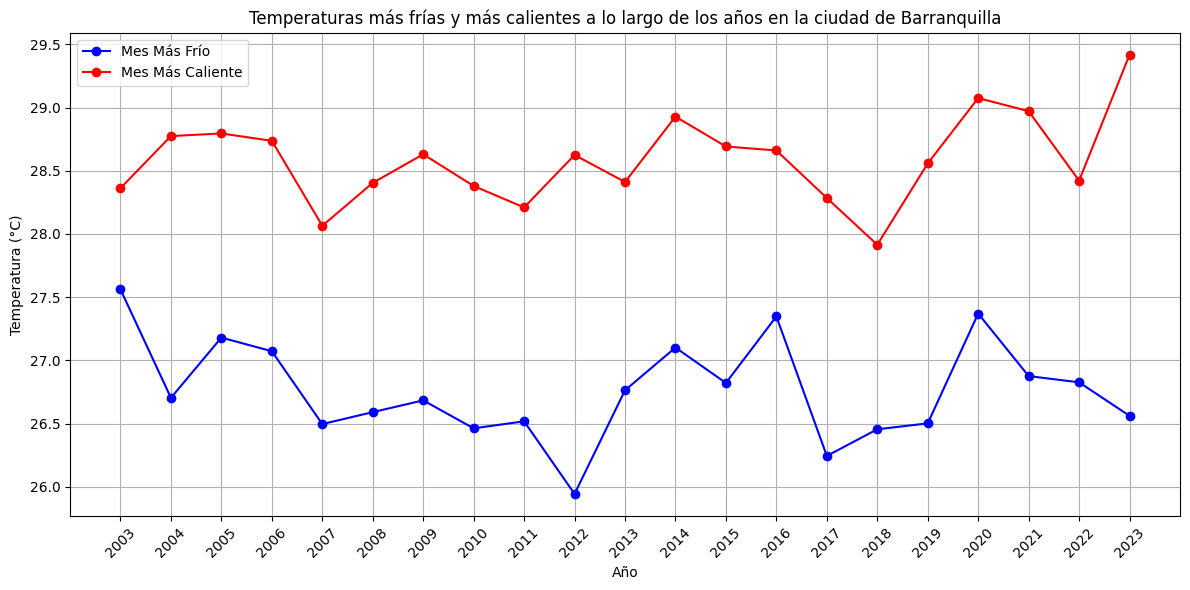

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

# Función para graficar las temperaturas más frías y más calientes a lo largo de los años
def plot_extreme_temperatures(df, city):
    # Filtrar los datos por ciudad
    city_data = df[['YEAR', 'MO', city]]
    cold_months = []
    hot_months = []
    cold_temps = []
    hot_temps = []

    # Iterar sobre los años
    for year in df['YEAR'].unique():
        monthly_avg_temp = city_data[city_data['YEAR'] == year].groupby('MO')[city].mean()

        # Encontrar el mes más frío y más caliente
        coldest_month = monthly_avg_temp.idxmin()
        hottest_month = monthly_avg_temp.idxmax()

        cold_months.append(coldest_month)
        hot_months.append(hottest_month)
        cold_temps.append(monthly_avg_temp[coldest_month])
        hot_temps.append(monthly_avg_temp[hottest_month])

    # Crear gráfico
    plt.figure(figsize=(12, 6))
    plt.plot(df['YEAR'].unique(), cold_temps, label='Mes Más Frío', marker='o', color='blue')
    plt.plot(df['YEAR'].unique(), hot_temps, label='Mes Más Caliente', marker='o', color='red')

    # Configurar los ticks del eje x para que vayan de uno en uno
    plt.xticks(df['YEAR'].unique(), rotation=45)  # Mostrar todos los años, rotados para que se vea bien

    # Añadir detalles
    plt.title(f'Temperaturas más frías y más calientes a lo largo de los años en la ciudad de {city.capitalize()}') #{city.capitalize()}
    plt.xlabel('Año')
    plt.ylabel('Temperatura (°C)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()  # Ajusta el layout para evitar el corte de las etiquetas
    plt.show()

# Lista de ciudades disponibles
cities = ['CALI', 'BOGOTÁ', 'BUCARAMANGA', 'BARRANQUILLA']

# Usar interact para crear la interfaz interactiva
interact(plot_extreme_temperatures,
         df=widgets.fixed(df),  # Asegura que el DataFrame no cambie
         city=widgets.Dropdown(options=cities, description='Ciudad:'))

In [ ]:
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt
from IPython.display import display

# Asegúrate de que la columna 'date' esté correctamente convertida
df['date'] = pd.to_datetime(df['YEAR'].astype(str) + '-' + df['MO'] + '-' + df['DY'].astype(str) + ' ' + df['HR'].astype(str) + ':00')

# Diccionario para mapear los números de mes a sus nombres
month_names = {
    '01': 'Enero', '02': 'Febrero', '03': 'Marzo', '04': 'Abril', '05': 'Mayo', '06': 'Junio',
    '07': 'Julio', '08': 'Agosto', '09': 'Septiembre', '10': 'Octubre', '11': 'Noviembre', '12': 'Diciembre'
}

# Lista de las ciudades para las que deseas hacer la tabla
cities = ['CALI', 'BOGOTÁ', 'BUCARAMANGA', 'BARRANQUILLA']

# Función para graficar tanto el mes más frío como el mes más caliente por ciudad seleccionada
def plot_extreme_temps_for_city(selected_city):
    # Filtrar los datos por la ciudad seleccionada
    city_data = df[['YEAR', 'MO', selected_city]]

    # Crear listas para almacenar los resultados de los meses más fríos y calientes
    cold_months = []
    hot_months = []
    cold_temperatures = []
    hot_temperatures = []

    # Iterar sobre todos los años
    for year in df['YEAR'].unique():
        # Agrupar por mes y calcular la temperatura media mensual para la ciudad y el año seleccionado
        monthly_avg_temp = city_data[city_data['YEAR'] == year].groupby('MO')[selected_city].mean()

        # Encontrar el mes más frío y el mes más caliente
        coldest_month = monthly_avg_temp.idxmin()
        hottest_month = monthly_avg_temp.idxmax()

        # Almacenar los resultados
        cold_months.append(month_names[coldest_month])  # Convertir el número de mes a nombre
        hot_months.append(month_names[hottest_month])  # Convertir el número de mes a nombre
        cold_temperatures.append(monthly_avg_temp[coldest_month])
        hot_temperatures.append(monthly_avg_temp[hottest_month])

    # Crear gráfico
    plt.figure(figsize=(12, 6))  # Ampliamos el tamaño para más espacio

    # Graficar mes más frío y mes más caliente
    plt.plot(df['YEAR'].unique(), cold_months, label=f'Mes Más Frío - {selected_city}', marker='o', color='blue')
    plt.plot(df['YEAR'].unique(), hot_months, label=f'Mes Más Caliente - {selected_city}', marker='o', color='red')

    # Añadir detalles al gráfico
    plt.title(f'Mes más frío y mes más caliente a lo largo de los años en la ciudad de {selected_city.capitalize()}')
    plt.xlabel('Año')
    plt.ylabel('Mes')
    plt.grid(True)

    # Ajustar el eje X para evitar etiquetas apiñadas
    plt.xticks(df['YEAR'].unique(), rotation=45, ha='right')  # Rotamos las etiquetas a la derecha

    plt.legend()
    plt.tight_layout()  # Ajuste automático del layout para evitar superposición
    plt.show()

# Crear un widget para seleccionar la ciudad
city_selector = widgets.Dropdown(
    options=cities,
    value='CALI',  # Valor por defecto
    description='Ciudad:',
    disabled=False
)

# Llamar a la función para graficar tanto el mes más frío como el mes más caliente para la ciudad seleccionada
widgets.interactive(plot_extreme_temps_for_city, selected_city=city_selector)

interactive(children=(Dropdown(description='Ciudad:', options=('CALI', 'BOGOTÁ', 'BUCARAMANGA', 'BARRANQUILLA'…

In [ ]:
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns

# Asegúrate de que la columna 'date' esté correctamente convertida
df['date'] = pd.to_datetime(df['YEAR'].astype(str) + '-' + df['MO'] + '-' + df['DY'].astype(str) + ' ' + df['HR'].astype(str) + ':00')

# Lista de las ciudades para las que deseas hacer la tabla
cities = ['CALI', 'BOGOTÁ', 'BUCARAMANGA', 'BARRANQUILLA']

# Diccionario para mapear los números de los meses a los nombres en español
meses = {
    1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 5: 'Mayo', 6: 'Junio',
    7: 'Julio', 8: 'Agosto', 9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'
}

# Función para graficar la repetición de meses más calientes a lo largo de los años
def plot_repeated_hot_months_with_years(selected_city):
    # Filtrar los datos por la ciudad seleccionada
    city_data = df[['YEAR', 'MO', selected_city]]

    # Crear una lista para almacenar los meses más calientes
    hot_months = []
    hot_month_years = []  # Para almacenar los años donde ese mes fue el más caliente

    # Iterar sobre todos los años
    for year in df['YEAR'].unique():
        # Agrupar por mes y calcular la temperatura media mensual para la ciudad y el año seleccionado
        monthly_avg_temp = city_data[city_data['YEAR'] == year].groupby('MO')[selected_city].mean()

        # Encontrar el mes más caliente
        hottest_month = monthly_avg_temp.idxmax()  # Cambié `idxmin()` por `idxmax()`
        hot_months.append(hottest_month)
        hot_month_years.append(year)

    # Crear un DataFrame con los años y los meses más calientes
    hot_month_df = pd.DataFrame({'Año': df['YEAR'].unique(), 'Mes Más Caliente': hot_months})

    # Contar cuántos años tuvieron el mismo mes más caliente
    hot_month_count = hot_month_df.groupby('Mes Más Caliente').size()

    # Ordenar los meses de menor a mayor
    hot_month_count = hot_month_count.sort_index()

    # Crear gráfico de barras
    plt.figure(figsize=(10, 6))
    ax = hot_month_count.plot(kind='bar', color='orange')  # Usé un color naranja para los meses más calientes

    # Añadir etiquetas dentro de las barras, con color negro y texto centrado verticalmente
    for i, month in enumerate(hot_month_count.index):
        # Filtrar los años que corresponden a ese mes
        years_for_month = hot_month_df[hot_month_df['Mes Más Caliente'] == month]['Año'].values
        # Calcular la posición de la etiqueta para apilar las etiquetas de años dentro de la barra
        positions = [hot_month_count[month] / 2 + j*0.5 for j in range(len(years_for_month))]  # Acomoda verticalmente

        # Añadir cada año como una etiqueta dentro de la barra, en una posición verticalmente apilada
        for j, position in enumerate(positions):
            ax.text(i, position, str(years_for_month[j]),
                    ha='center', va='center', fontsize=9, color='black', rotation=0)

    # Cambiar los números del eje X por los nombres de los meses
    ax.set_xticklabels([meses[int(month)] for month in hot_month_count.index])

    # Añadir detalles al gráfico
    plt.title(f'Repetición de meses más calientes a lo largo de los años en la ciudad de {selected_city.capitalize()}') #selected_city.capitalize()
    plt.xlabel('Mes más caliente')
    plt.ylabel('Número de años')
    plt.xticks(rotation=45, ha="right")  # Rotar las etiquetas para que se vean bien
    plt.grid(True)
    plt.tight_layout()  # Ajusta el layout para evitar que se corte el gráfico
    plt.show()

# Crear un widget para seleccionar la ciudad
city_selector = widgets.Dropdown(
    options=cities,
    value='CALI',  # Valor por defecto
    description='Ciudad: ',
    disabled=False
)

# Llamar a la función para graficar la repetición de meses más calientes para la ciudad seleccionada
widgets.interactive(plot_repeated_hot_months_with_years, selected_city=city_selector)

interactive(children=(Dropdown(description='Ciudad: ', options=('CALI', 'BOGOTÁ', 'BUCARAMANGA', 'BARRANQUILLA…

In [ ]:
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns

# Asegúrate de que la columna 'date' esté correctamente convertida
df['date'] = pd.to_datetime(df['YEAR'].astype(str) + '-' + df['MO'] + '-' + df['DY'].astype(str) + ' ' + df['HR'].astype(str) + ':00')

# Lista de las ciudades para las que deseas hacer la tabla
cities = ['CALI', 'BOGOTÁ', 'BUCARAMANGA', 'BARRANQUILLA']

# Diccionario para mapear los números de los meses a los nombres en español
meses = {
    1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 5: 'Mayo', 6: 'Junio',
    7: 'Julio', 8: 'Agosto', 9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'
}

# Función para graficar la repetición de meses más fríos a lo largo de los años
def plot_repeated_cold_months_with_years(selected_city):
    # Filtrar los datos por la ciudad seleccionada
    city_data = df[['YEAR', 'MO', selected_city]]

    # Crear una lista para almacenar los meses más fríos
    cold_months = []
    cold_month_years = []  # Para almacenar los años donde ese mes fue el más frío

    # Iterar sobre todos los años
    for year in df['YEAR'].unique():
        # Agrupar por mes y calcular la temperatura media mensual para la ciudad y el año seleccionado
        monthly_avg_temp = city_data[city_data['YEAR'] == year].groupby('MO')[selected_city].mean()

        # Encontrar el mes más frío
        coldest_month = monthly_avg_temp.idxmin()
        cold_months.append(coldest_month)
        cold_month_years.append(year)

    # Crear un DataFrame con los años y los meses más fríos
    cold_month_df = pd.DataFrame({'Año': df['YEAR'].unique(), 'Mes Más Frío': cold_months})

    # Contar cuántos años tuvieron el mismo mes más frío
    cold_month_count = cold_month_df.groupby('Mes Más Frío').size()

    # Ordenar los meses de menor a mayor
    cold_month_count = cold_month_count.sort_index()

    # Crear gráfico de barras
    plt.figure(figsize=(10, 6))
    ax = cold_month_count.plot(kind='bar', color='skyblue')

    # Añadir etiquetas de año dentro de las barras, con orientación vertical y color negro
    for i, month in enumerate(cold_month_count.index):
        # Filtrar los años que corresponden a ese mes
        years_for_month = cold_month_df[cold_month_df['Mes Más Frío'] == month]['Año'].values
        # Calcular las posiciones para apilar las etiquetas dentro de la barra
        positions = [cold_month_count[month] / 2 + j*0.5 for j in range(len(years_for_month))]  # Acomoda verticalmente

        # Añadir cada año como una etiqueta dentro de la barra, en una posición verticalmente apilada
        for j, position in enumerate(positions):
            ax.text(i, position, str(years_for_month[j]),
                    ha='center', va='center', fontsize=9, color='black', rotation=0)

    # Cambiar los números por los nombres de los meses en el eje X
    ax.set_xticklabels([meses[int(month)] for month in cold_month_count.index])

    # Añadir detalles al gráfico
    plt.title(f'Repetición de meses más fríos a lo largo de los años en la ciudad de {selected_city.capitalize()}')
    plt.xlabel('Mes más frío')
    plt.ylabel('Número de años')
    plt.xticks(rotation=45, ha="right")  # Rotar las etiquetas para que se vean bien
    plt.grid(True)
    plt.tight_layout()  # Ajusta el layout para evitar que se corte el gráfico
    plt.show()

# Crear un widget para seleccionar la ciudad
city_selector = widgets.Dropdown(
    options=cities,
    value='CALI',  # Valor por defecto
    description='Ciudad: ',
    disabled=False
)

# Llamar a la función para graficar la repetición de meses más fríos para la ciudad seleccionada
widgets.interactive(plot_repeated_cold_months_with_years, selected_city=city_selector)

interactive(children=(Dropdown(description='Ciudad: ', options=('CALI', 'BOGOTÁ', 'BUCARAMANGA', 'BARRANQUILLA…

#Parte para pruebas

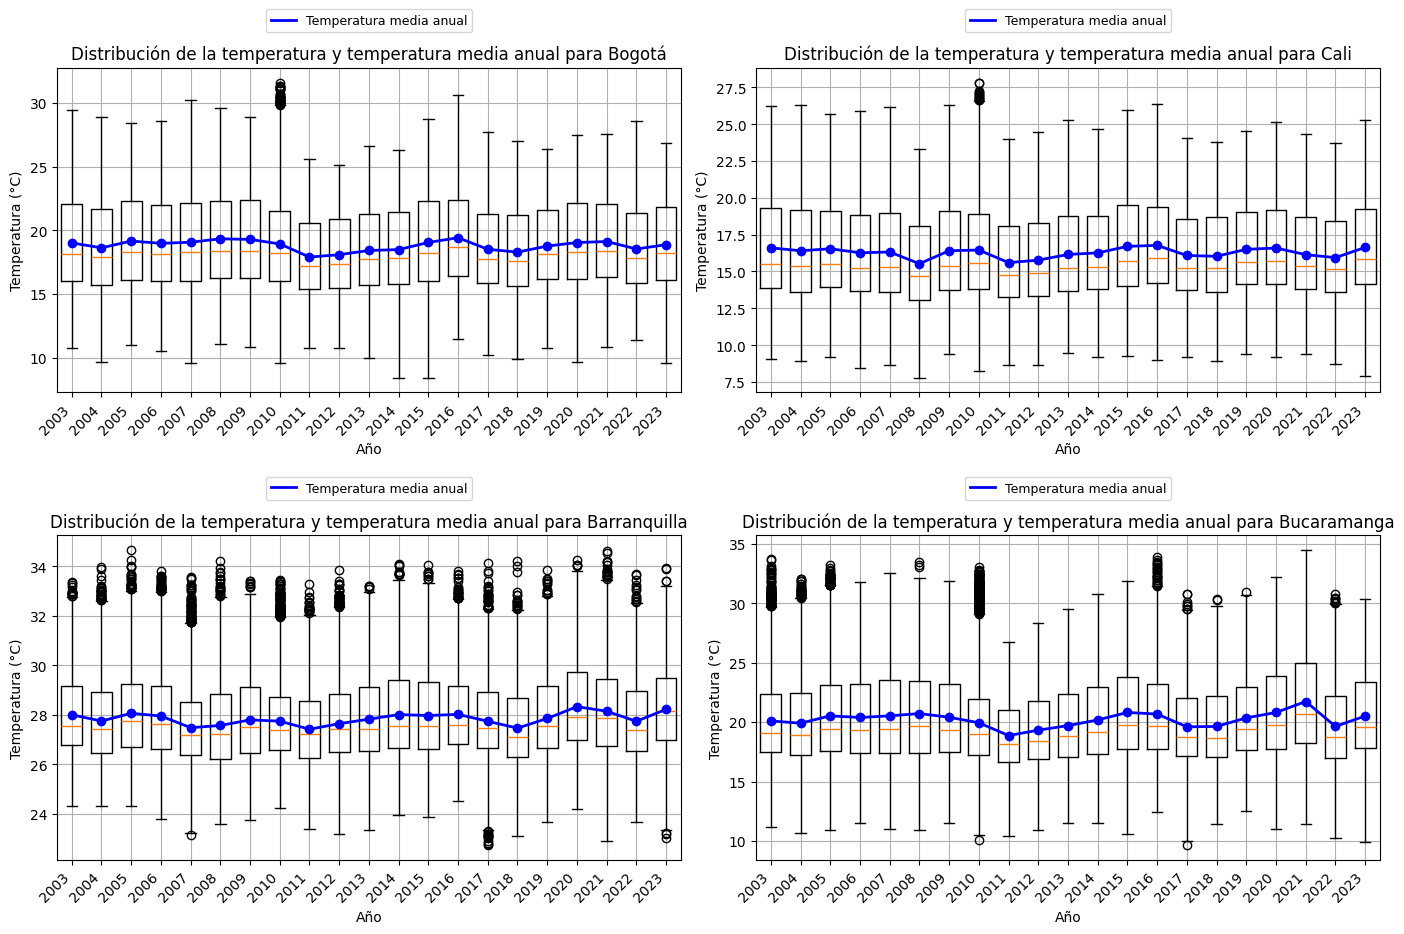

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact
from matplotlib.lines import Line2D  # Necesario para crear un objeto de línea para la leyenda

# Asegúrate de que la columna 'date' esté correctamente formateada
df['date'] = pd.to_datetime(df['YEAR'].astype(str) + '-' + df['MO'] + '-' + df['DY'].astype(str) + ' ' + df['HR'].astype(str) + ':00')

# Lista de ciudades
cities = ['CALI', 'BOGOTÁ', 'BUCARAMANGA', 'BARRANQUILLA']

# Función para generar el gráfico de boxplot por año y ciudad, con los puntos de temperatura media anual y una línea conectando los puntos
def plot_temp_boxplot_by_year():
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # Crear una matriz 2x2 para las gráficas

    # Lista de ciudades y sus posiciones en el gráfico
    city_pos = {
        'BOGOTÁ': (0, 0),  # Fila 1, Columna 1
        'CALI': (0, 1),    # Fila 1, Columna 2
        'BARRANQUILLA': (1, 0),  # Fila 2, Columna 1
        'BUCARAMANGA': (1, 1),   # Fila 2, Columna 2
    }

    # Iterar sobre las ciudades y sus posiciones en la matriz
    for city in cities:
        # Filtrar los datos de la ciudad seleccionada
        city_data = df[['YEAR', city]]

        # Calcular la temperatura media anual por año para la ciudad seleccionada
        city_yearly_avg = city_data.groupby('YEAR')[city].mean()

        # Obtener la posición del gráfico en la matriz
        row, col = city_pos[city]

        # Crear el boxplot por cada año para la ciudad seleccionada
        city_year_data = [city_data[city][city_data['YEAR'] == year] for year in sorted(city_data['YEAR'].unique())]

        # Crear el boxplot
        axes[row, col].boxplot(city_year_data, vert=True, positions=sorted(city_data['YEAR'].unique()), widths=0.7)

        # Agregar los puntos de la temperatura media anual por año
        axes[row, col].scatter(city_yearly_avg.index, city_yearly_avg.values, color='b', zorder=5, marker='o')

        # Añadir una línea conectando los puntos azules
        axes[row, col].plot(city_yearly_avg.index, city_yearly_avg.values, color='b', linestyle='-', linewidth=2, zorder=4)

        # Añadir título y etiquetas
        axes[row, col].set_title(f'Distribución de la temperatura y temperatura media anual para {city.capitalize()}')
        axes[row, col].set_xlabel('Año')
        axes[row, col].set_ylabel('Temperatura (°C)')

        # Ajustar el rango del eje X para que vaya de manera clara
        axes[row, col].set_xticks(sorted(city_data['YEAR'].unique()))
        axes[row, col].set_xticklabels(sorted(city_data['YEAR'].unique()), rotation=45, ha='right')

        # Mostrar grid
        axes[row, col].grid(True)

        # Crear un objeto Line2D para la leyenda (para que tenga color azul)
        blue_line = Line2D([0], [0], color='b', lw=2, label='Temperatura media anual')

        # Añadir la leyenda encima de cada gráfico, ajustando la posición para evitar la superposición
        axes[row, col].legend(handles=[blue_line], loc='upper center', bbox_to_anchor=(0.5, 1.2), fontsize=9, ncol=1)

    # Ajustar los espacios entre las gráficas para evitar superposiciones
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Deja más espacio en la parte superior para las leyendas

    # Mostrar la figura con la leyenda encima de cada gráfico
    plt.show()

# Llamar a la función para mostrar los gráficos
plot_temp_boxplot_by_year()

In [ ]:
import pandas as pd

# Intenta leer el archivo con la codificación 'ISO-8859-1'
df = pd.read_csv('temperatura.csv', encoding='ISO-8859-1')

# Mostrar las primeras filas del DataFrame
df.head()

,YEAR,MO,DY,HR,CALI,BOGOTÁ,BUCARAMANGA,BARRANQUILLA
0,2003,1,1,0,15.04,17.73,20.12,26.82
1,2003,1,1,1,14.48,17.11,19.68,26.76
2,2003,1,1,2,13.88,16.48,19.48,26.66
3,2003,1,1,3,13.21,15.93,19.30,26.48
4,2003,1,1,4,12.53,15.48,18.90,26.15


In [ ]:
import ipywidgets as widgets
from IPython.display import display

# Función para calcular y mostrar estadísticas para la ciudad seleccionada
def obtener_estadisticas_ciudad(ciudad):
    # Verificar que la ciudad proporcionada exista en las columnas del DataFrame
    if ciudad not in df.columns:
        print(f"La ciudad {ciudad} no existe en el DataFrame.")
        return

    # Agrupar por 'YEAR' y calcular las estadísticas descriptivas para la ciudad seleccionada
    ciudad_stats = df.groupby('YEAR')[ciudad].describe()

    # Eliminar la columna 'count' de las estadísticas
    ciudad_stats = ciudad_stats.drop(columns='count')

    # Mostrar las estadísticas descriptivas sin la columna 'count'
    display(ciudad_stats)

# Crear un widget desplegable para seleccionar la ciudad
ciudades = ['CALI', 'BOGOTÁ', 'BUCARAMANGA', 'BARRANQUILLA']  # Ciudades del DataFrame
ciudad_selector = widgets.Dropdown(
    options=ciudades,
    description='Ciudad:',
    disabled=False
)

# Conectar el widget con la función usando interact
widgets.interactive(obtener_estadisticas_ciudad, ciudad=ciudad_selector)


interactive(children=(Dropdown(description='Ciudad:', options=('CALI', 'BOGOTÁ', 'BUCARAMANGA', 'BARRANQUILLA'…

#Lo que este aca abajo borrar

In [ ]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

# Asegurarnos de que la columna 'date' esté en formato datetime
df['date'] = pd.to_datetime(df['date'])

# Extraer el año y el mes de la columna 'date'
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Seleccionar las ciudades
cities = ['CALI', 'BOGOTÁ', 'BUCARAMANGA', 'BARRANQUILLA']

# Calcular la media y desviación estándar por año, mes y ciudad
monthly_stats = []

for city in cities:
    # Agrupar por año, mes y ciudad, y calcular la media y desviación estándar
    city_stats = df.groupby(['year', 'month'])[city].agg(['mean', 'std']).reset_index()
    city_stats['city'] = city
    monthly_stats.append(city_stats)

# Concatenar las estadísticas de todas las ciudades
final_stats = pd.concat(monthly_stats)

# Crear el widget para seleccionar múltiples años
year_selector = widgets.SelectMultiple(
    options=[(str(year), year) for year in final_stats['year'].unique()],
    description='Años:',
    disabled=False
)

# Crear el widget para seleccionar la ciudad
city_selector = widgets.Dropdown(
    options=cities,
    description='Ciudad:',
    disabled=False
)

# Función para filtrar y mostrar la tabla basada en los filtros
def filter_data(years, city):
    # Filtrar los datos por los años y ciudad seleccionados
    filtered_data = final_stats[(final_stats['year'].isin(years)) & (final_stats['city'] == city)]

    # Mostrar la tabla filtrada solo con la columna 'mean' (sin 'std')
    display(filtered_data[['year', 'month', 'mean']])

# Vincular los widgets con la función para filtrar y mostrar la tabla
widgets.interactive(filter_data, years=year_selector, city=city_selector)


interactive(children=(SelectMultiple(description='Años:', options=(('2003', 2003), ('2004', 2004), ('2005', 20…

In [ ]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

# Asegurarnos de que la columna 'date' esté en formato datetime
df['date'] = pd.to_datetime(df['date'])

# Extraer el año y el mes de la columna 'date'
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Seleccionar las ciudades
cities = ['CALI', 'BOGOTÁ', 'BUCARAMANGA', 'BARRANQUILLA']

# Calcular la media y desviación estándar por año, mes y ciudad
monthly_stats = []

for city in cities:
    # Agrupar por año, mes y ciudad, y calcular la media y desviación estándar
    city_stats = df.groupby(['year', 'month'])[city].agg(['mean', 'std']).reset_index()
    city_stats['city'] = city
    monthly_stats.append(city_stats)

# Concatenar las estadísticas de todas las ciudades
final_stats = pd.concat(monthly_stats)

# Crear el widget para seleccionar múltiples años
year_selector = widgets.SelectMultiple(
    options=[(str(year), year) for year in final_stats['year'].unique()],
    description='Años:',
    disabled=False
)

# Crear el widget para seleccionar la ciudad
city_selector = widgets.Dropdown(
    options=cities,
    description='Ciudad:',
    disabled=False
)

# Ajustar la opción de pandas para mostrar todas las filas
pd.set_option('display.max_rows', None)

# Función para filtrar y mostrar la tabla basada en los filtros
def filter_data(years, city):
    # Filtrar los datos por los años y ciudad seleccionados
    filtered_data = final_stats[(final_stats['year'].isin(years)) & (final_stats['city'] == city)]

    # Mostrar la tabla filtrada solo con la columna 'mean' (sin 'std')
    display(filtered_data[['year', 'month', 'mean']])

# Vincular los widgets con la función para filtrar y mostrar la tabla
widgets.interactive(filter_data, years=year_selector, city=city_selector)


interactive(children=(SelectMultiple(description='Años:', options=(('2003', 2003), ('2004', 2004), ('2005', 20…